<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 2 Assignment 1*

Analyze a corpus of text using text visualization of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Stemming
- Lemmatization
- Custom stopword removal
- Using frequency based stopwrod removal

You are free to use any dataset you are interested in. Kaggle is a great place to start. Feel free to sample the data if the dataset is too large to handle in memory. 

-------------
## Lyric Analyzer

1. Create corpus of all lyrics available for a given artist.
2. Clean, tokenize, and lemmatize the corpus (use stop words)
3. Add frequency features
4. Visualize with `squarify`

In [1]:
# Data
import numpy as np
import pandas as pd
from collections import Counter
from tswift import Artist, Song

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

### API & Data Exploration

In [2]:
# An artist picked randomly from my music library
the_cure = Artist('The Cure')

In [3]:
the_cure.songs[:10]

[Song(title='I Dont Know Whats Going On', artist='The Cure'),
 Song(title='1015 Saturday Night', artist='The Cure'),
 Song(title='13Th', artist='The Cure'),
 Song(title='2 Late', artist='The Cure'),
 Song(title='39', artist='The Cure'),
 Song(title='A Boy I Never Knew', artist='The Cure'),
 Song(title='A Chain Of Flowers', artist='The Cure'),
 Song(title='A Few Hours After This', artist='The Cure'),
 Song(title='A Fool For Your Stockings', artist='The Cure'),
 Song(title='A Foolish Arrangement', artist='The Cure')]

In [4]:
# Create a (iterable and indexed) list of songs
the_cure_songs = [song.__getattribute__('title') for song in the_cure.songs]
print(the_cure_songs[:10])

['I Dont Know Whats Going On', '1015 Saturday Night', '13Th', '2 Late', '39', 'A Boy I Never Knew', 'A Chain Of Flowers', 'A Few Hours After This', 'A Fool For Your Stockings', 'A Foolish Arrangement']


Below are two different ways to query for lyrics using `tswift`. One includes extra text as metadata describing the artist and song name. Other artists or songs may include various tags describing lyric structure e.g. chorus, bridge, pre-chorus, etc..

In [5]:
import random

song = random.choice(the_cure.songs)
print(song.format())

Disintegration
The Cure
--------------

Oh I miss the kiss of treachery
The shameless kiss of vanity
The soft and the black and the velvety
Up tight against the side of me
And mouth and eyes and heart all bleed
And run in thickening streams of greed
As bit by bit it starts the need
To just let go
My party piece
Oh I miss the kiss of treachery
The aching kiss before I feed
The stench of a love for a younger meat

And the sound that it makes
When it cuts in deep
The holding up on bended knees
The addiction of duplicities
As bit by bit it starts the need
To just let go
My party piece
But I never said I would stay to the end
So I leave you with babies and hoping for frequency
Screaming like this in the hope of the secrecy
Screaming me over and over and over
I leave you with photographs

Pictures of trickery
Stains on the carpet and
Stains on the scenery
Songs about happiness murmured in dreams
When we both us knew
How the ending would be...
So it's all come back round to breaking apart aga

In [6]:
# Alternative method: Use the Song class to retrieve lyrics by sluggifying Artist and Song string data
song = random.choice(the_cure_songs)
s = Song(song, 'The Cure')
print(s.title, '\n', s.lyrics)

Underneath The Stars 
 Floating here like this with you
Underneath the stars
Alight for 13 billion years
The view is beautiful
And ours alone tonight
Underneath the stars

Spinning round and round with you
Watching shadows melt the light
Soft shining from our eyes
into another space
is our alone tonight
watching shadows melt

And the waves break
And the waves break

Whisper in my ear a wish
"We could drift away"
Held tight
Your voice inside my head
The kiss is infinite
And ours alone tonight
"We could drift away"

Flying here like this with you
Underneath the stars
Alight for 13 billion years
The view is beautiful
And ours alone tonight
Underneath the stars

And everything gone
And all still to come
As nothing to us
Together as one
In each others' arms
So near and so far
Forever as now
Underneath the stars

As the waves break...


### Create DataFrame of Lyrics

In [7]:
# Create dataframe of all songs and lyrics for The Cure
lyrics_dict = {s.title: s.lyrics for s in the_cure.songs}
lyrics_zipped = list(zip(lyrics_dict.keys(), lyrics_dict.values()))
lyrics_df = pd.DataFrame(lyrics_zipped, columns=['title', 'lyrics'])

lyrics_df.head(10)

,title,lyrics
0,I Dont Know Whats Going On,I don't know what's going on\nI am so up close...
1,1015 Saturday Night,10.15 on a Saturday night\nAnd the tap\nDrips ...
2,13Th,"'Everyone feels good in the room,' she swings\..."
3,2 Late,So I'll wait for you\nWhere I always wait\nBeh...
4,39,So the fire is almost out and there's nothing ...
5,A Boy I Never Knew,To have his arms\nAround me\nTo sense\nHis per...
6,A Chain Of Flowers,
7,A Few Hours After This,The look before I go\nIs the look for you\nYou...
8,A Fool For Your Stockings,
9,A Foolish Arrangement,Christabel strips\nAnd slips like a dream\nBre...


### Remove Songs with No Lyrics

In [8]:
lyrics_df[(lyrics_df['lyrics'] == '') | (lyrics_df['lyrics'] == 'instrumental')]

,title,lyrics
6,A Chain Of Flowers,
8,A Fool For Your Stockings,
11,A Hymn To Him,
15,A New Voice,
18,A Reflection,instrumental
21,A Storm Is Coming,
33,Another Journey By Train,instrumental
47,Boys Dont Cry New Voice Club Mix 1986,
54,Close To Me Extended Mix 1985,
62,Cut Here If Only Mix 2018,


In [9]:
# Remove songs with no lyrics
lyrics_df['lyrics'] = lyrics_df['lyrics'].replace(to_replace='', value=np.NaN).replace(to_replace='instrumental', value=np.NaN)
lyrics_df = lyrics_df.dropna(axis=0, how='any')
lyrics_df.isna().sum()

title     0
lyrics    0
dtype: int64

### Filter with Stop Words

In [10]:
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

STOP_WORDS = nlp.Defaults.stop_words.union(['\n'])

In [11]:
# Update tokens by removing stop words
tokens = []

for doc in tokenizer.pipe(lyrics_df['lyrics'], batch_size=500):
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(re.sub(r'[^a-zA-Z ^0-9]', '', token.text).lower())
   
    tokens.append(doc_tokens)
    
lyrics_df['tokens'] = tokens
lyrics_df['tokens'].head()

0    [i, dont, know, whats, going, i, close, i, don...
1    [1015, saturday, night, and, tap, drips, strip...
2    [everyone, feels, good, room, swings, two, cho...
3    [so, ill, wait, where, i, wait, behind, signs,...
4    [so, fire, theres, left, burn, ive, run, right...
Name: tokens, dtype: object

### Lemmatize Lyrics

In [12]:
# Lemmatize the corpus
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False))\
        and (token.pos_ != '-PRON-') and (token.text != '\n')\
        and (token.text != '\n\n'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [13]:
lyrics_df['lemmas'] = lyrics_df['lyrics'].apply(get_lemmas)
lyrics_df.head(5)

,title,lyrics,tokens,lemmas
0,I Dont Know Whats Going On,I don't know what's going on\nI am so up close...,"[i, dont, know, whats, going, i, close, i, don...","[know, go, close, know, go, know, go, confused..."
1,1015 Saturday Night,10.15 on a Saturday night\nAnd the tap\nDrips ...,"[1015, saturday, night, and, tap, drips, strip...","[10.15, Saturday, night, tap, drip, strip, lig..."
2,13Th,"'Everyone feels good in the room,' she swings\...","[everyone, feels, good, room, swings, two, cho...","[feel, good, room, swing, chord, cool, head, s..."
3,2 Late,So I'll wait for you\nWhere I always wait\nBeh...,"[so, ill, wait, where, i, wait, behind, signs,...","[wait, wait, sign, sell, news, watch, like, ye..."
4,39,So the fire is almost out and there's nothing ...,"[so, fire, theres, left, burn, ive, run, right...","[fire, leave, burn, run, right, thought, run, ..."


### Create Frequency Features

In [14]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = list(zip(word_counts.keys(), word_counts.values()))
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = list(zip(appears_in.keys(), appears_in.values()))
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [15]:
wc = count(lyrics_df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

In [16]:
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
89,like,131,423,1.0,0.021619,0.021619,0.496212
7,love,95,330,2.0,0.016866,0.038485,0.359848
46,want,76,273,3.0,0.013953,0.052438,0.287879
2,know,101,246,4.0,0.012573,0.065011,0.382576
32,time,104,228,5.0,0.011653,0.076664,0.393939
27,feel,101,225,6.0,0.011500,0.088163,0.382576
72,oh,71,220,7.0,0.011244,0.099407,0.268939
179,come,76,199,8.0,0.010171,0.109578,0.287879
39,away,102,191,9.0,0.009762,0.119340,0.386364
65,yeah,49,184,10.0,0.009404,0.128744,0.185606


### Visualize with `squarify`

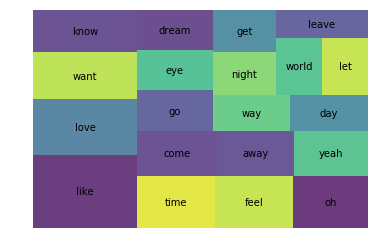

In [17]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## Stretch Goals

* Write a web scraper that can scrape "Data Scientist" job listings from indeed.com.
* Look ahead to some of the topics from later this week:
 - Part of Speech Tagging
 - Named Entity Recognition
 - Document Classification
* Try a different visualization techniques
* Automate the process of retriving job listings. ;)